**Choosing Countries** <br>
A total of 25 countires have been choosen. 


*   The first 10 countries are those with high new cases and the include Mexico, Brazil, Ukraine, India, USA, Panama, Hungary, Pakistan, Israel, Bulgaria. (Source : https://www.worldometers.info/coronavirus , retrieved on : April 24, 2020, information last updated on: retrieved on : April 24, 2020).

*  Next 10 countries are those with lowest new cases and they include Spain, Italy, France, Germany, UK, Turkey, Iran, Russia, Belgium, Canada.  (Source : https://www.worldometers.info/coronavirus , retrieved on : April 24, 2020, information last updated on retrieved on : April 24, 2020). 

*  Last 5 countries are those with GDP closer to Pakistan's. Including closest 5 countries which are Bangladesh, India, Nigeria, Vietnam, Egypt. (Source : http://statisticstimes.com/economy/projected-world-gdp-ranking.php , retrieved on : April 24, 2020, information last on 20 Feb 2020).
 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Loading Data

In [ ]:
countries_diff_format = ["Mexico", "Brazil", "Ukraine", "India", "United States", "Panama", "Hungary", "Pakistan", "Israel", "Bulgaria",
             "Spain", "Italy", "France", "Germany", "United Kingdom", "Turkey", "Iran", "Russia", "Belgium", "Canada",
             "Bangladesh", "India", "Nigeria", "Vietnam", "Egypt",
             "Saint Lucia","Saint Vincent and the Grenadines","Jamaica","Liechtenstein","British Virgin Islands","Trinidad and Tobago",
             "Honduras","Nicaragua","Dominica","United States Virgin Islands","Namibia",
             "Sudan","Mauritius","New Caledonia","Papua New Guinea","Belize"]


             
covid_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv',parse_dates=['date'])

#covid_data = covid_data.loc[covid_data['location'].isin(countries_diff_format)]

#Sorting data by dates (Times series)
#covid_data = covid_data.sort_values(by='date',ascending=True)

In [ ]:
a = covid_data.copy()
a = a.sort_values(by='total_cases',ascending=False)
top_location = a.location.unique().tolist()
countries_diff_format = top_location[1:41]
covid_data = covid_data.sort_values(by='date',ascending=True)

In [ ]:
covid_data.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


## Dealing with NaN data

In [ ]:
covid_data.isnull().sum()

iso_code                               0
continent                            172
location                               0
date                                   0
total_cases                          225
new_cases                            225
total_deaths                         226
new_deaths                           226
total_cases_per_million              225
new_cases_per_million                225
total_deaths_per_million             226
new_deaths_per_million               226
total_tests                        17552
new_tests                          18211
total_tests_per_thousand           17552
new_tests_per_thousand             18211
new_tests_smoothed                 16965
new_tests_smoothed_per_thousand    16965
tests_units                        16348
stringency_index                    4495
population                             0
population_density                   905
median_age                          2033
aged_65_older                       2348
aged_70_older   

In [ ]:
# dropping the NaN data
#covid_data = covid_data.fillna(0)

## Selecting Data

In [ ]:
data = covid_data.copy()

#Dropping location now only
#data = data.drop('location',1)
data = data.drop('iso_code',1)
data = data.drop('continent',1)

## dropping columns with double information for eg total cases and total cases_per_million tell the same information
#data = data.drop('total_cases', 1)

data = data.drop('total_cases_per_million', 1)
data = data.drop('new_cases_per_million', 1)
data = data.drop('total_deaths_per_million', 1)
data = data.drop('new_deaths', 1)
data = data.drop('new_deaths_per_million', 1)
data = data.drop('total_tests',1)
data = data.drop('new_tests_smoothed',1)
data = data.drop('total_tests_per_thousand',1)
data = data.drop('new_tests_per_thousand',1)
data = data.drop('new_tests_smoothed_per_thousand',1)
data = data.drop('tests_units',1)

#data = data.drop('aged_70_older',1)

print(data.shape)
data.head()

(24535, 21)


,location,date,total_cases,new_cases,total_deaths,new_tests,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Afghanistan,2019-12-31,0.0,0.0,0.0,NaN,NaN,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83
10674,Iran,2019-12-31,0.0,0.0,0.0,NaN,NaN,83992953,49.831,32.4,5.440,3.182,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68
10509,Indonesia,2019-12-31,0.0,0.0,0.0,NaN,NaN,273523621,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72
4106,Canada,2019-12-31,0.0,0.0,0.0,NaN,NaN,37742157,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.50,82.43
902,Armenia,2019-12-31,0.0,0.0,0.0,NaN,NaN,2963234,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09


### Pearson’s Correlation Coefficient Matrix


In [ ]:
data[data.columns[:]].corr()['new_cases'][:]

total_cases                   0.930915
new_cases                     1.000000
total_deaths                  0.920285
new_tests                     0.802440
stringency_index              0.106139
population                    0.668713
population_density           -0.018049
median_age                    0.019577
aged_65_older                 0.015310
aged_70_older                 0.012954
gdp_per_capita                0.010122
extreme_poverty              -0.029438
cvd_death_rate               -0.030097
diabetes_prevalence           0.018687
female_smokers               -0.007274
male_smokers                 -0.005429
handwashing_facilities        0.022165
hospital_beds_per_thousand   -0.014424
life_expectancy               0.005338
Name: new_cases, dtype: float64

<Figure size 432x288 with 0 Axes>

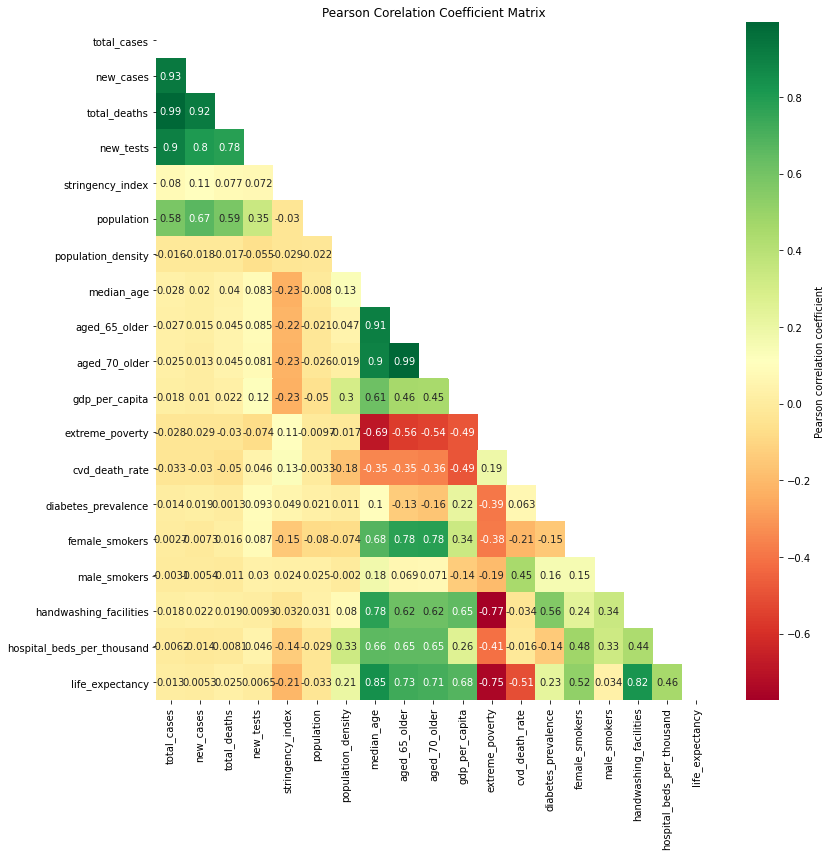

In [ ]:
plt.clf()

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,12))

fig = sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=True, ax=ax, 
            cbar_kws={'label':'Pearson correlation coefficient'})

fig.set_title('Pearson Corelation Coefficient Matrix')
fig.tick_params(axis='x', rotation=90)
fig.tick_params(axis='y', rotation=0)

fig = fig.get_figure()
fig.tight_layout()
fig.show()

Dropping columns with |P| > 0.1

In [ ]:
# not removing total_Cases now because they will be used to make data categorical
data = data.drop(['population','new_tests','total_deaths'],1)

In [ ]:
data.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

## Making data categorcial for location and data

In [ ]:
#data['start_date'] = data['date'].iloc[0]
data['number_of_days'] = -1

In [ ]:
#adding location again
data['location'] = covid_data['location']

#changing data to categorical data by converting it to number of days. Since there is data for everyday just assigning a number to every date.
#data['number_of_days'] = (data['date'] - data['start_date']).dt.days
#data = data.drop('start_date',1)

#changing location to categorical by having a column for every country

for i in countries_diff_format:
  data[i] = 0

for i in countries_diff_format:
  data.loc[data['location'] == i, i] = 1
data = data.drop(data.loc[np.isin(data["location"], countries_diff_format, invert = True)].index)

#data = data.drop('location',axis = 1)

#having an index number to later extract info of a particular country
#data['row_number'] = np.arange(len(data))

# Dealing with number of days

In [ ]:
df = data.copy(deep=True)

for i in countries_diff_format:

   # the date where first case was reported in a country
  start_date = min(df[(df[i] == 1) & (df.total_cases > 0)]["date"])
  
  #Count of day from the day when first case was reported
  df.loc[(df[i] == 1),'number_of_days'] = (df.loc[(df[i] == 1),'date'] - start_date).dt.days
  #removing rows before the date on which first case was reported
  #a = df.loc[(df.date < start_date) & (df[i] == 1)].number_of_days
  #print(a.value_counts(),i)

df = df.drop(df.loc[(df["number_of_days"] < 0)].index)
for i in countries_diff_format:
    print(df[(df[i]==1) & (df["number_of_days"]==0)][["date"]].tail(1), i)
#df.to_csv('removing 0 cases.csv')

            date
23354 2020-01-21 United States
           date
3262 2020-02-26 Brazil
            date
18667 2020-02-01 Russia
            date
10368 2020-01-30 India
            date
23192 2020-01-31 United Kingdom
            date
20816 2020-02-01 Spain
            date
17720 2020-03-07 Peru
            date
11481 2020-01-31 Italy
           date
4649 2020-03-04 Chile
            date
10725 2020-02-20 Iran
           date
8599 2020-01-28 Germany
            date
22709 2020-03-12 Turkey
            date
14716 2020-02-29 Mexico
            date
17206 2020-02-27 Pakistan
           date
7970 2020-01-25 France
            date
19418 2020-03-03 Saudi Arabia
           date
1933 2020-03-09 Bangladesh
           date
4132 2020-01-26 Canada
           date
4756 2019-12-31 China
            date
18358 2020-03-01 Qatar
            date
20431 2020-03-06 South Africa
           date
2337 2020-02-04 Belgium
           date
4930 2020-03-07 Colombia
           date
2189 2020-02-28 Belarus
        

In [ ]:
# a = data.copy(deep =True)
# p = a[a.Pakistan ==1]
# s_d = p.loc[(p.total_cases > 0)].date.iloc[0]
# p.number_of_days = p.date - s_d
# #print(p.number_of_days)
# p.drop(p[p.date < s_d].index,inplace = True)
# print(p.number_of_days)

#print(df[df["number_of_days"] == 0].to_csv("testing.csv"))
df["number_of_days"].value_counts()

0      40
98     40
93     40
97     40
56     40
       ..
153     1
168     1
164     1
160     1
169     1
Name: number_of_days, Length: 172, dtype: int64

In [ ]:
print(df[df["number_of_days"] == 0][["date"]])

            date
4756  2019-12-31
23354 2020-01-21
19950 2020-01-24
7970  2020-01-25
4132  2020-01-26
23022 2020-01-27
8599  2020-01-28
10368 2020-01-30
17855 2020-01-30
23192 2020-01-31
11481 2020-01-31
18667 2020-02-01
21437 2020-02-01
20816 2020-02-01
2337  2020-02-04
6840  2020-02-15
10725 2020-02-20
12440 2020-02-24
56    2020-02-25
17038 2020-02-25
3262  2020-02-26
21634 2020-02-26
17206 2020-02-27
2189  2020-02-28
16010 2020-02-28
14716 2020-02-29
6688  2020-03-01
18358 2020-03-01
10571 2020-03-02
18104 2020-03-03
19418 2020-03-03
4649  2020-03-04
17994 2020-03-04
797   2020-03-04
22897 2020-03-04
20431 2020-03-06
17720 2020-03-07
4930  2020-03-07
1933  2020-03-09
22709 2020-03-12


In [ ]:
#df = data.copy()
#df = df.drop('date',axis = 1)

#df.set_index(['row_number'])
#df = df.fillna(0)
print(df.isnull().sum())
print(df[np.isnan(df["hospital_beds_per_thousand"])]["location"].value_counts())

location                         0
date                             0
total_cases                     31
new_cases                       31
stringency_index               257
population_density               0
median_age                       0
aged_65_older                    0
aged_70_older                    0
gdp_per_capita                   0
extreme_poverty               1708
cvd_death_rate                   0
diabetes_prevalence              0
female_smokers                 106
male_smokers                   211
handwashing_facilities        3519
hospital_beds_per_thousand       0
life_expectancy                  0
number_of_days                   0
United States                    0
Brazil                           0
Russia                           0
India                            0
United Kingdom                   0
Spain                            0
Peru                             0
Italy                            0
Chile                            0
Iran                

In [ ]:
#dealing for missing stringent_index
for i in countries_diff_format:

   # the date where first case was reported in a country
    last_stringent = df[(df[i] == 1 & ~np.isnan(df["stringency_index"]))]["stringency_index"]
    print(i)
    last_stringent = (last_stringent[~np.isnan(last_stringent)].values[-1])
  
  #Count of day from the day when first case was reported
    df.loc[(df[i] == 1 & np.isnan(df["stringency_index"])),'stringency_index'] = last_stringent

United States
Brazil
Russia
India
United Kingdom
Spain
Peru
Italy
Chile
Iran
Germany
Turkey
Mexico
Pakistan
France
Saudi Arabia
Bangladesh
Canada
China
Qatar
South Africa
Belgium
Colombia
Belarus
Sweden
Egypt
Netherlands
Ecuador
United Arab Emirates
Indonesia
Singapore
Portugal
Kuwait
Argentina
Ukraine
Switzerland
Poland
Philippines
Afghanistan
Oman


In [ ]:
#deleting all rows where number of cases is missing.Doing this cos only 31 rows have missing cases
df = df.drop(df.loc[np.isnan(df["new_cases"])].index)

In [ ]:
#dealing with extreme poverty missing values. France Germany Nigeria have those missing values, hence replacing with similar countries
# df.loc[(df["France"] == 1), "extreme_poverty"] = np.mean(df[df["Italy"] == 1]["extreme_poverty"])
# df.loc[(df["Germany"] == 1), "extreme_poverty"] = np.mean(df[df["Italy"] == 1]["extreme_poverty"])
# df.loc[(df["Nigeria"] == 1), "extreme_poverty"] = np.mean(df[df["Iran"] == 1]["extreme_poverty"])

#Doing same with hospital_beds_per_thousand
#df.loc[(df["Nigeria"] == 1), "hospital_beds_per_thousand"] = np.mean(df[df["Iran"] == 1]["hospital_beds_per_thousand"])
df = df.drop( "extreme_poverty",1)
df = df.drop("handwashing_facilities", axis = 1)

df.loc[(df['Afghanistan'] == 1), 'female_smokers'] = np.mean(df[df["Pakistan"] == 1]['female_smokers'])
df.loc[(df['Afghanistan'] == 1), 'male_smokers'] = np.mean(df[df["Pakistan"] == 1]['male_smokers'])
df.loc[(df['Peru'] == 1), 'male_smokers'] = np.mean(df[df["Brazil"] == 1]['male_smokers'])

In [ ]:
# now dropping total cases too as corelation was high
df = df.drop('total_cases',1)

In [ ]:
print(df.isnull().sum())

location                      0
date                          0
new_cases                     0
stringency_index              0
population_density            0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
cvd_death_rate                0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
hospital_beds_per_thousand    0
life_expectancy               0
number_of_days                0
United States                 0
Brazil                        0
Russia                        0
India                         0
United Kingdom                0
Spain                         0
Peru                          0
Italy                         0
Chile                         0
Iran                          0
Germany                       0
Turkey                        0
Mexico                        0
Pakistan                      0
France                        0
Saudi Ar

In [ ]:
pak_cases = df[df['Pakistan'] == 1] 

Pakistan    109
Name: location, dtype: int64


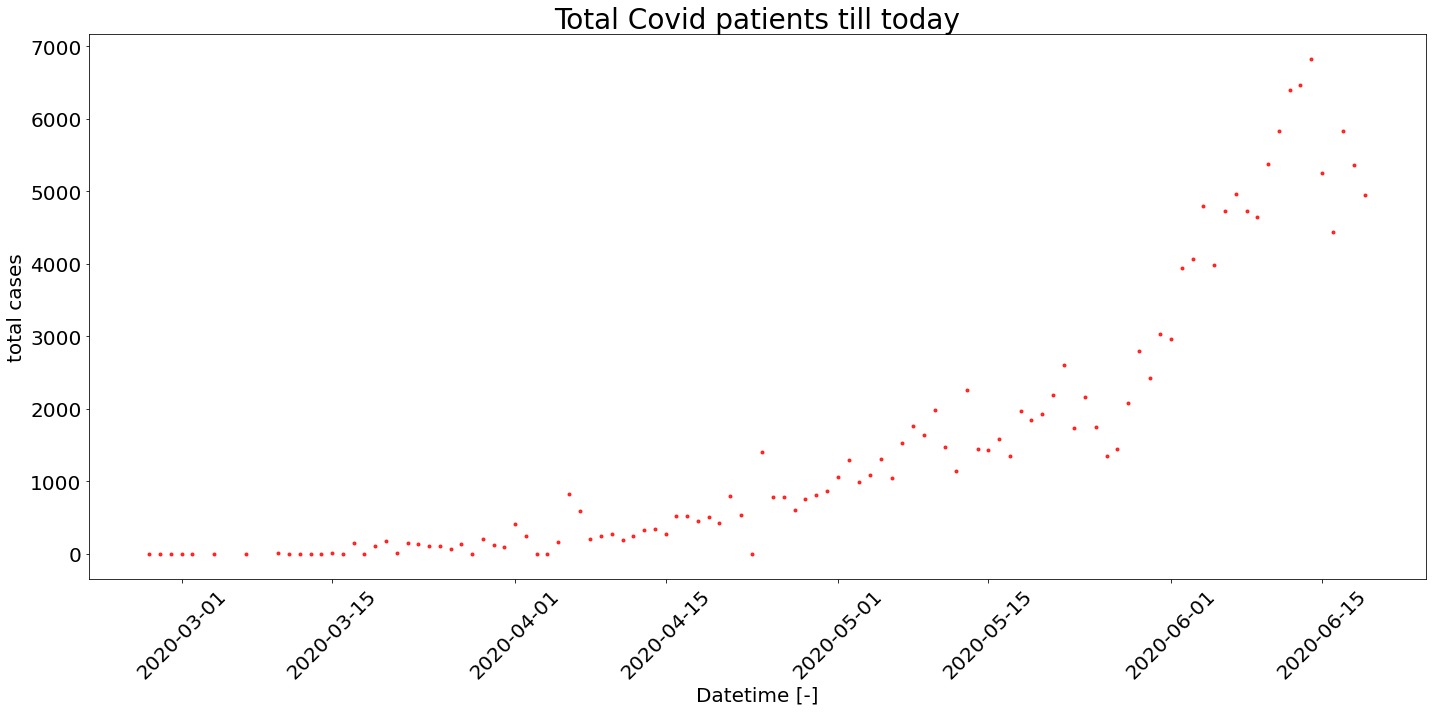

In [ ]:
# Plotting the target: Total cases
print(pak_cases["location"].value_counts())

plt.figure(figsize=(20,10))

plt.plot(pak_cases["date"], pak_cases['new_cases'], '.', color='red', label='Original data', alpha=0.8)
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'total cases', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.title('Total Covid patients till today', fontsize=28)

plt.tight_layout()

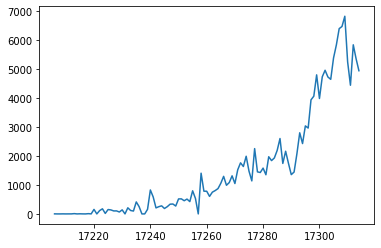

In [ ]:
plt.plot(pak_cases['new_cases'])
plt.show()

In [ ]:
df.dtypes

location                              object
date                          datetime64[ns]
new_cases                            float64
stringency_index                     float64
population_density                   float64
median_age                           float64
aged_65_older                        float64
aged_70_older                        float64
gdp_per_capita                       float64
cvd_death_rate                       float64
diabetes_prevalence                  float64
female_smokers                       float64
male_smokers                         float64
hospital_beds_per_thousand           float64
life_expectancy                      float64
number_of_days                         int64
United States                          int64
Brazil                                 int64
Russia                                 int64
India                                  int64
United Kingdom                         int64
Spain                                  int64
Peru      

##Splitting into training and tests data

In [ ]:
from sklearn.metrics import mean_squared_error
df_regression = df['new_cases']

df_regression = df.copy(deep = True)
train_size = 0.8

split_index = int(df.shape[0]*train_size) #index at which the datafram will be split

train = df_regression[:split_index]
train_y = train["new_cases"]


test = df_regression[split_index:]
test_y = test["new_cases"]

import statsmodels.api as sm

model = sm.OLS.from_formula(formula = 'new_cases ~ 1 + number_of_days + I(number_of_days ** 2) + I(number_of_days ** 3)  + C(location)', data = train).fit()
print(model.summary())
pred_train = model.predict(train)
print(np.sqrt(mean_squared_error(pred_train, train_y)))

pred_test = model.predict(test)
print(np.sqrt(mean_squared_error(pred_test, test_y)))

                            OLS Regression Results                            
Dep. Variable:              new_cases   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     86.20
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:11:30   Log-Likelihood:                -36060.
No. Observations:                3879   AIC:                         7.221e+04
Df Residuals:                    3836   BIC:                         7.248e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [ ]:
#to_day= pd.to_datetime('today')
#df[(df['Pakistan']==1) & (df['date'] - to_day > -5) ]

In [ ]:
# y = df['new_cases']

#X = df.drop(['new_cases'], axis=1)
#X = X.drop(["location", "date"], axis = 1)
# train_size = 0.7

# split_index = int(df.shape[0]*train_size) #index at which the datafram will be split

# X_train = X[:split_index]
# y_train = y[:split_index]

# X_test = X[split_index:]
# y_test = y[split_index:]

#NEW CODE FOR SPLITTING
X = df.copy(deep = True)
X = X.drop(["location", "date"], axis = 1)
t = df[(df["Pakistan"] == 1)]["number_of_days"]
test_set = X[(X["Pakistan"] == 1)][X["number_of_days"] >= max(t) -5]

train_set = X.drop(X[(X["Pakistan"] == 1)][X["number_of_days"] >= max(t) -5].index,  axis = 0)



X_train = train_set.drop(["new_cases"], axis = 1)
y_train = train_set["new_cases"]

X_test = test_set.drop(["new_cases"], axis = 1)
y_test = test_set["new_cases"]

split_index = len(y_train.values)
print(X_test.head(5))


       stringency_index  population_density  ...  Afghanistan  Oman
17309             72.69             255.573  ...            0     0
17310             72.69             255.573  ...            0     0
17311             72.69             255.573  ...            0     0
17312             72.69             255.573  ...            0     0
17313             72.69             255.573  ...            0     0

[5 rows x 53 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler(with_mean=True, with_std=True).fit(X_train)

X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))

((4843, 53), (4843,))
((6, 53), (6,))


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-31.76043418743828

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))
print(y_pred, y_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

18351253.166666668
[1155. 1187. 1215. 1247. 1271. 1303.] 17309    6825.0
17310    5248.0
17311    4443.0
17312    5839.0
17313    5358.0
17314    4944.0
Name: new_cases, dtype: float64
4283.836267490468


In [ ]:
# DO NOT RUN THIS
X_test = X[split_index:]
pak_indices_dates = []

pak_indices = list(X_test[X_test['Pakistan']==1].index)

for i in pak_indices:
    pak_indices_dates.append(data.date.loc[[i]].values[0])

X_test_1 = X[split_index:]
X_test_1["test_number"] = np.arange(len(X_test_1))
y_pred_pak_indices = X_test_1[X_test_1['Pakistan']==1]
pak_y_pred= y_pred[y_pred_pak_indices.test_number.tolist()]
print("pak_y_pred shape",pak_y_pred.shape)

pak_y_test= y_test.to_numpy()[y_pred_pak_indices.test_number.tolist()]
print("pak_y_test shape",pak_y_test.shape)

pak_y_pred shape (0,)
pak_y_test shape (0,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


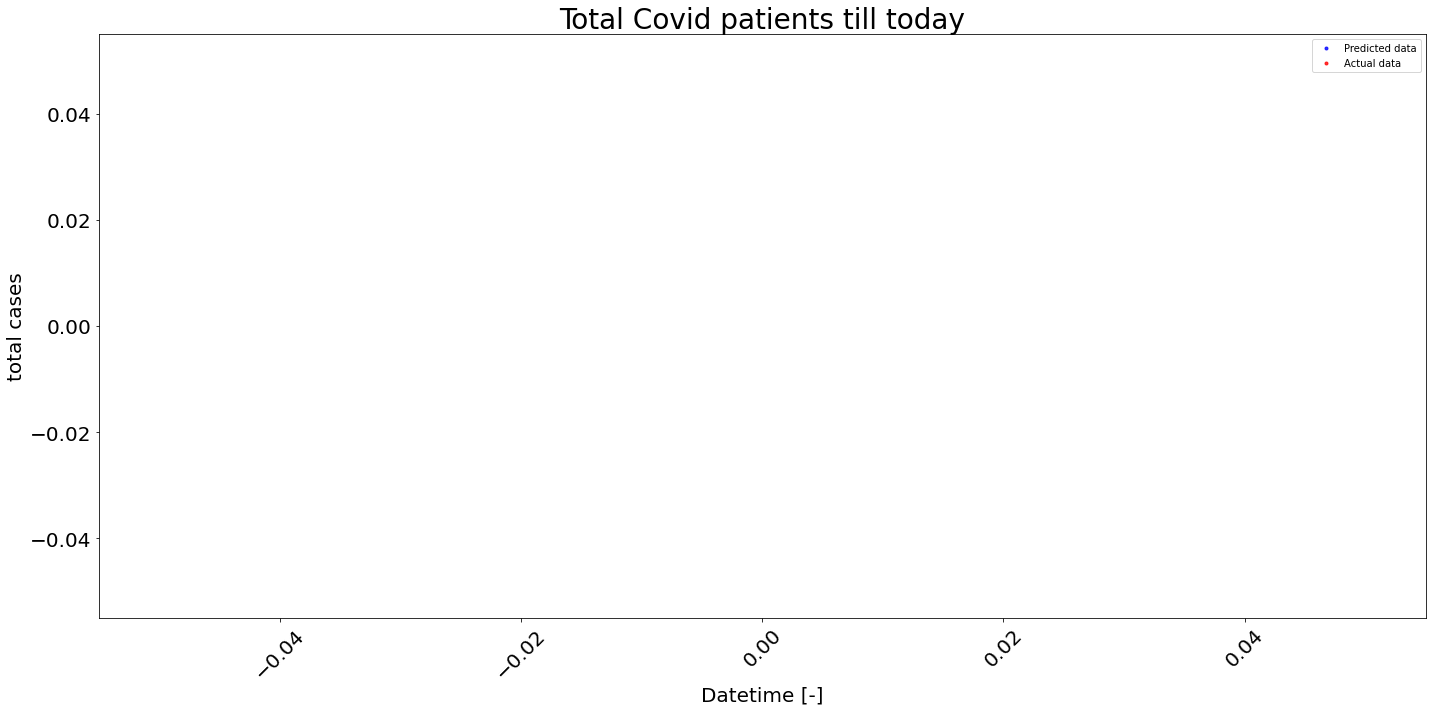

In [ ]:
# Plotting the target: Total cases

plt.figure(figsize=(20,10))

plt.plot(pak_indices_dates, pak_y_pred, '.', color='blue', label='Predicted data', alpha=0.8)
plt.plot(pak_indices_dates, pak_y_test, '.', color='red', label='Actual data', alpha=0.8)
plt.legend()
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'total cases', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.title('Total Covid patients till today', fontsize=28)

plt.tight_layout()


In [ ]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(3)
model.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_train)
print("train errors")
print(mean_squared_error(y_train,y_pred))
print(np.sqrt(mean_squared_error(y_train,y_pred)))
print("--")
print("test errors")
y_pred = model.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

train errors
493139.51343290426
702.2389290212443
--
test errors
1186637.3888888883
1089.3288708598925


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


pak_y_pred shape (0,)
pak_y_test shape (0,)


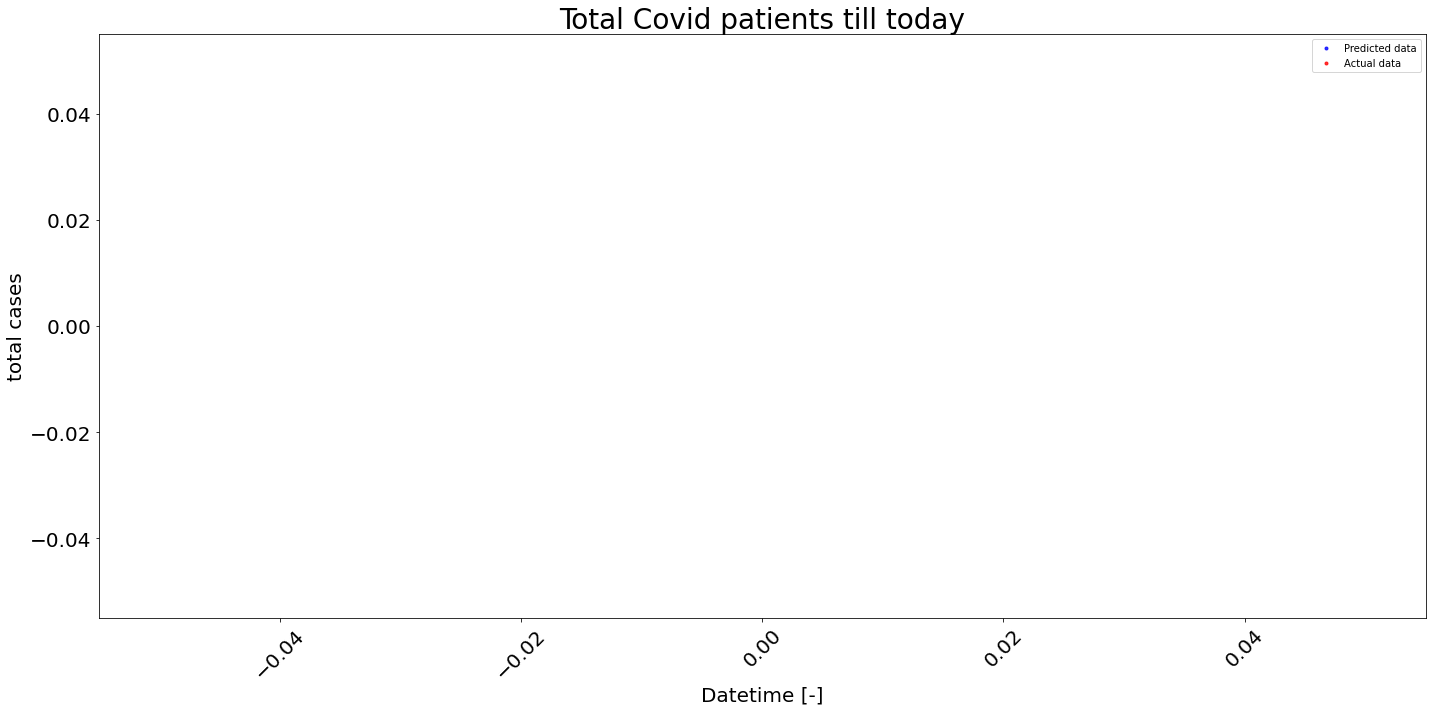

In [ ]:
#DO NOT RUN THIS
X_test = X[split_index:]
pak_indices_dates = []

pak_indices = list(X_test[X_test['Pakistan']==1].index)

for i in pak_indices:
    pak_indices_dates.append(data.date.loc[[i]].values[0])

X_test_1 = X[split_index:]
X_test_1["test_number"] = np.arange(len(X_test_1))
y_pred_pak_indices = X_test_1[X_test_1['Pakistan']==1]
pak_y_pred= y_pred[y_pred_pak_indices.test_number.tolist()]
print("pak_y_pred shape",pak_y_pred.shape)

pak_y_test= y_test.to_numpy()[y_pred_pak_indices.test_number.tolist()]
print("pak_y_test shape",pak_y_test.shape)

plt.figure(figsize=(20,10))

plt.plot(pak_indices_dates, pak_y_pred, '.', color='blue', label='Predicted data', alpha=0.8)
plt.plot(pak_indices_dates, pak_y_test, '.', color='red', label='Actual data', alpha=0.8)
plt.legend()
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'total cases', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.title('Total Covid patients till today', fontsize=28)

plt.tight_layout()


train errors
1884212.3404994837
1372.6661431314913
--
test errors
1823272.172358026
1350.2859594760016
pak_y_pred shape (0,)
pak_y_test shape (0,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


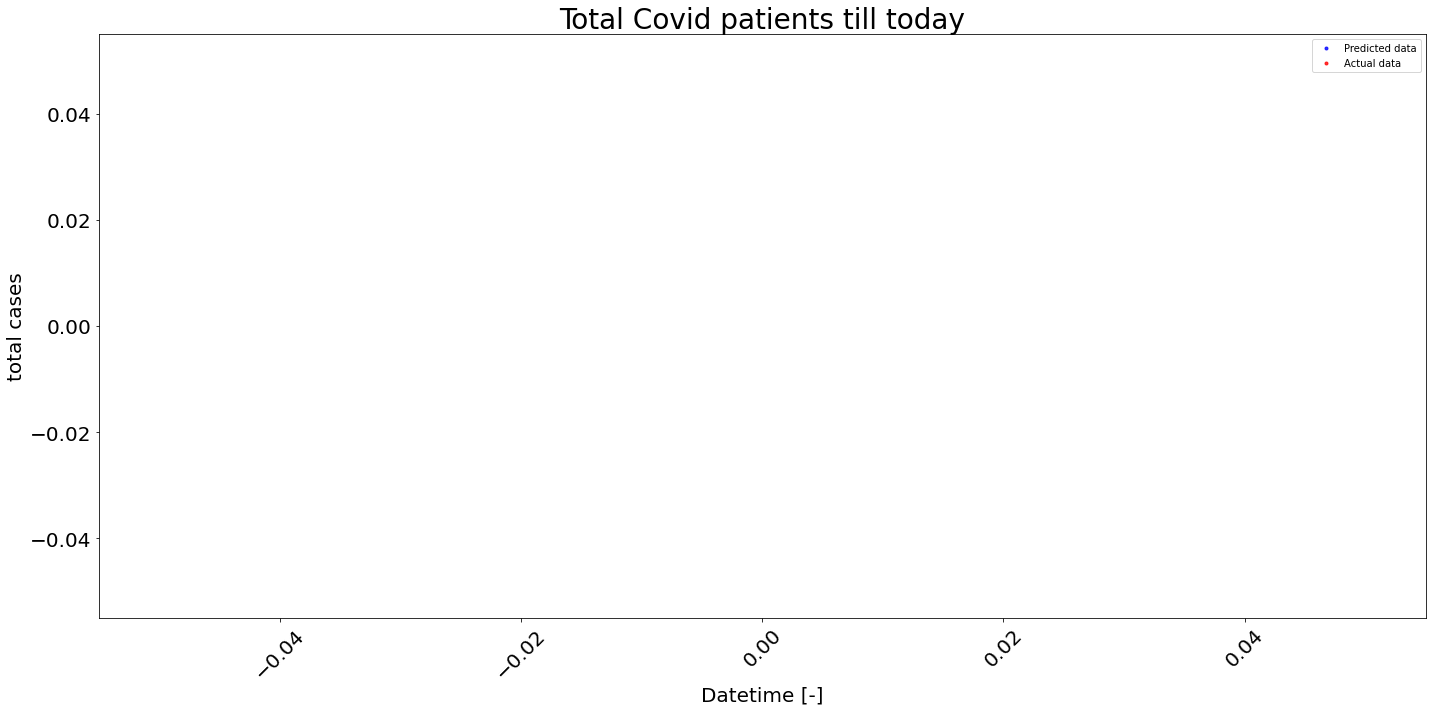

In [ ]:
#DO NOT RUN THIS CELL
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor


model = BaggingRegressor(max_features = 35)
model.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_train)
print("train errors")
print(mean_squared_error(y_train,y_pred))
print(np.sqrt(mean_squared_error(y_train,y_pred)))
print("--")
print("test errors")
y_pred = model.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

X_test = X[split_index:]
pak_indices_dates = []

pak_indices = list(X_test[X_test['Pakistan']==1].index)

for i in pak_indices:
    pak_indices_dates.append(data.date.loc[[i]].values[0])

X_test_1 = X[split_index:]
X_test_1["test_number"] = np.arange(len(X_test_1))
y_pred_pak_indices = X_test_1[X_test_1['Pakistan']==1]
pak_y_pred= y_pred[y_pred_pak_indices.test_number.tolist()]
print("pak_y_pred shape",pak_y_pred.shape)

pak_y_test= y_test.to_numpy()[y_pred_pak_indices.test_number.tolist()]
print("pak_y_test shape",pak_y_test.shape)

plt.figure(figsize=(20,10))

plt.plot(pak_indices_dates, pak_y_pred, '.', color='blue', label='Predicted data', alpha=0.8)
plt.plot(pak_indices_dates, pak_y_test, '.', color='red', label='Actual data', alpha=0.8)
plt.legend()
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'total cases', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.title('Total Covid patients till today', fontsize=28)

plt.tight_layout()


## Deep Neural Network

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras import regularizers
from keras.optimizers import Adam

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from time import time
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))

((4843, 53), (4843,))
((6, 53), (6,))


In [ ]:
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.08))

model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.15))   

model.add(Dense(256, kernel_regularizer=regularizers.l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.15))   

model.add(Dense(32, kernel_regularizer=regularizers.l2(0.01), use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.15))   

model.add(Dense(1))


In [ ]:
Adam = Adam(lr = 0.0001)
model.compile(optimizer = Adam, loss = 'mse', metrics = ['mse'])
hist = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test,y_test))

Train on 4843 samples, validate on 6 samples
Epoch 1/100
4843/4843 [==============================] - 4s 754us/step - loss: 19782419.5705 - mse: 19782412.0000 - val_loss: 30181506.0000 - val_mse: 30181502.0000
Epoch 2/100
4843/4843 [==============================] - 1s 289us/step - loss: 19769440.1578 - mse: 19769428.0000 - val_loss: 30158506.0000 - val_mse: 30158502.0000
Epoch 3/100
4843/4843 [==============================] - 1s 290us/step - loss: 19762922.3497 - mse: 19762920.0000 - val_loss: 30129380.0000 - val_mse: 30129376.0000
Epoch 4/100
4843/4843 [==============================] - 1s 293us/step - loss: 19758869.3736 - mse: 19758862.0000 - val_loss: 30116746.0000 - val_mse: 30116742.0000
Epoch 5/100
4843/4843 [==============================] - 1s 292us/step - loss: 19755132.9693 - mse: 19755128.0000 - val_loss: 30101374.0000 - val_mse: 30101370.0000
Epoch 6/100
4843/4843 [==============================] - 1s 286us/step - loss: 19751848.3694 - mse: 19751846.0000 - val_loss: 3010

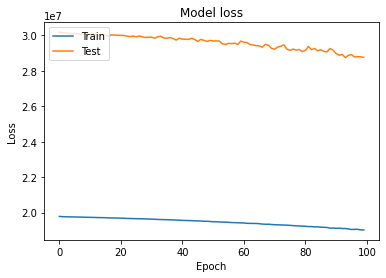

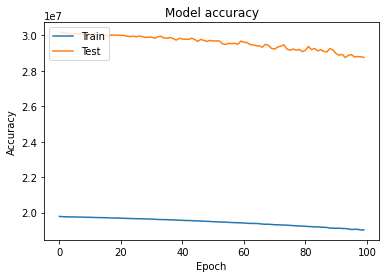

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#Plot both the training accuracy as well as the validation accuracy on the same plot
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Recurrent Neural Network

In [ ]:
from keras.layers.recurrent import LSTM,GRU
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [ ]:
look_back = 5
samples = len(X_train)
num_features = X_train.shape[1]

samples_train = X_train.shape[0] - look_back
X_train_reshaped = np.zeros((samples_train, look_back, num_features)) # Initialize the required shape with an 'empty' zeros array.
y_train_reshaped = np.zeros((samples_train))


for i in range(samples_train):
    y_position = i + look_back
    #print(y_position)
    X_train_reshaped[i] = X_train[i:y_position]
    y_train_reshaped[i] = y_train.iloc[y_position]


samples_test = X_test.shape[0] - look_back
X_test_reshaped = np.zeros((samples_test, look_back, num_features))
y_test_reshaped = np.zeros((samples_test))

for i in range(samples_test):
    y_position = i + look_back
    X_test_reshaped[i] = X_test[i:y_position]
    y_test_reshaped[i] = y_test.iloc[y_position]

In [ ]:
model = Sequential()
model.add(LSTM(10, input_shape=(look_back, num_features), return_sequences=True, kernel_initializer='TruncatedNormal'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))


model.add(LSTM(5, kernel_initializer='TruncatedNormal', return_sequences=True))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))   


model.add(LSTM(3, kernel_initializer='TruncatedNormal', return_sequences=False))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))


model.add(Dense(500, kernel_initializer='TruncatedNormal'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))

model.add(Dense(250, kernel_initializer='TruncatedNormal'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))


model.add(Dense(75, kernel_initializer='TruncatedNormal'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))
    
model.add(Dense(1))


In [ ]:
from keras.optimizers import Adam
Adam = Adam(lr = 0.001)
model.compile(optimizer = Adam, loss = 'mse', metrics = ['mse'])
hist = model.fit(X_train_reshaped, y_train_reshaped, epochs = 500, batch_size = 64, validation_data = (X_test_reshaped,y_test_reshaped))

Train on 4838 samples, validate on 1 samples
Epoch 1/500
4838/4838 [==============================] - 6s 1ms/step - loss: 9184590.5903 - mse: 9184592.0000 - val_loss: 12959754.0000 - val_mse: 12959754.0000
Epoch 2/500
4838/4838 [==============================] - 4s 769us/step - loss: 9489713.1625 - mse: 9489713.0000 - val_loss: 13086637.0000 - val_mse: 13086637.0000
Epoch 3/500
4838/4838 [==============================] - 4s 758us/step - loss: 9181589.4898 - mse: 9181591.0000 - val_loss: 13136236.0000 - val_mse: 13136236.0000
Epoch 4/500
4838/4838 [==============================] - 4s 764us/step - loss: 9530123.4810 - mse: 9530124.0000 - val_loss: 11620842.0000 - val_mse: 11620842.0000
Epoch 5/500
4838/4838 [==============================] - 4s 772us/step - loss: 9388551.7486 - mse: 9388552.0000 - val_loss: 11474816.0000 - val_mse: 11474816.0000
Epoch 6/500
4838/4838 [==============================] - 4s 753us/step - loss: 9146716.1736 - mse: 9146715.0000 - val_loss: 11413678.0000 - va

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#Plot both the training accuracy as well as the validation accuracy on the same plot
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: ignored